### SVM Classifiers for classification of open/close questions

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
openCloseData = pd.read_csv('openCloseData.csv')

In [3]:
openCloseData.columns

Index(['Unnamed: 0', 'PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'],
      dtype='object')

In [4]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)

(159996, 35)
(159996, 34)


In [5]:
# openCloseData.dtypes
# openCloseData.loc[openCloseData['Reputation'] == 'https://i.stack.imgur.com/TLzJW.png?s=128&g=1']
openCloseData.loc[openCloseData['UserId'] == 443]

,PostId,UserId,Comment,Body,Title,Tags,Reputation,experienceInTime,WebsiteUrl,Location,...,countOfInterrogativeSent,sentencesStartWithYouCount,sentencesStartWithICount,shortWordCount,bodyWordCount,punctuationCount,websiteUrlFilled,locationFilled,aboutMeFilled,profileImageUrlFilled


In [6]:
openCloseData.loc[openCloseData['UserId'] == 11] 

,PostId,UserId,Comment,Body,Title,Tags,Reputation,experienceInTime,WebsiteUrl,Location,...,countOfInterrogativeSent,sentencesStartWithYouCount,sentencesStartWithICount,shortWordCount,bodyWordCount,punctuationCount,websiteUrlFilled,locationFilled,aboutMeFilled,profileImageUrlFilled


In [7]:
print(openCloseData.shape)

(159996, 34)


In [8]:
X = openCloseData.loc[:,['Reputation',
       'experienceInTime', 'Views',
       'Upvotes', 'Downvotes', 'tagCount', 'closed',
       'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'] ]
# X['Reputation'] = pd.to_numeric(X['Reputation'])
X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(159996, 24)
<class 'pandas.core.frame.DataFrame'>


In [9]:
X.dtypes

Reputation                      int64
experienceInTime                int64
Views                           int64
Upvotes                         int64
Downvotes                       int64
tagCount                        int64
closed                          int64
lowerUpperRatio               float64
sentenceCount                   int64
firstLineLength                 int64
codeLength                      int64
urlCount                        int64
SOUrlCount                      int64
titleLengthInChars              int64
countOfInterrogativeSent        int64
sentencesStartWithYouCount      int64
sentencesStartWithICount        int64
shortWordCount                  int64
bodyWordCount                   int64
punctuationCount                int64
websiteUrlFilled                int64
locationFilled                  int64
aboutMeFilled                   int64
profileImageUrlFilled           int64
dtype: object

In [10]:
y = X.closed
X.drop(['closed'],inplace=True,axis=1)
print(y.shape)
print(X.shape)

(159996,)
(159996, 23)


In [11]:
#x=(x-u)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.mean_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'])

<class 'numpy.ndarray'>


In [12]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
print(X_train.head())

        Reputation  experienceInTime     Views   Upvotes  Downvotes  tagCount  \
29416    -0.115114          0.452619 -0.010520  0.398696  -0.053556 -0.738430   
58063    -0.183569          0.678131 -0.169540 -0.230655  -0.065531 -1.553673   
62206    -0.116962          0.013553 -0.106049 -0.059482   0.003322  0.892056   
14790    -0.178488         -0.871412 -0.170123 -0.291145  -0.065531 -1.553673   
152752   -0.172206         -0.000114 -0.132261 -0.273127  -0.062537  1.707299   

        lowerUpperRatio  sentenceCount  firstLineLength  codeLength  \
29416          0.667997      -0.344881         3.634055   -0.049610   
58063         -0.204290      -0.344881        -0.415458   -0.394312   
62206          1.891518      -0.133287        -0.255151   -0.394312   
14790         -0.271389      -0.250840         0.142134   -0.394312   
152752        -0.121783      -0.274350         0.302441   -0.345069   

                ...            countOfInterrogativeSent  \
29416           ...        

In [14]:
print(X_train.shape)

(111997, 23)


#### Using LinearSVC

In [15]:
c = list(np.arange(1, 26, 0.5))
accuracy = []
y_predicted = np.zeros((y_test.shape))
max_accuracy = 0.0
linear_svm_classifier = LinearSVC()

for i in c:
    classifier = LinearSVC(C = i)
    classifier.fit(X_train, y_train)
    predicted_y = classifier.predict(X_test)
    accuracy.append(np.mean(y_test==predicted_y))
    print('Accuracy for C = {} is : {:.4f}'.format(i, accuracy[-1]))
    if(accuracy[-1] > max_accuracy):
        y_predicted = predicted_y
        max_accuracy = accuracy[-1]
        linear_svm_classifier = classifier

Accuracy for C = 1.0 is : 0.8191
Accuracy for C = 1.5 is : 0.8214
Accuracy for C = 2.0 is : 0.8230
Accuracy for C = 2.5 is : 0.8240
Accuracy for C = 3.0 is : 0.8252
Accuracy for C = 3.5 is : 0.8264
Accuracy for C = 4.0 is : 0.8275
Accuracy for C = 4.5 is : 0.8275
Accuracy for C = 5.0 is : 0.8276
Accuracy for C = 5.5 is : 0.8292
Accuracy for C = 6.0 is : 0.8309
Accuracy for C = 6.5 is : 0.8293
Accuracy for C = 7.0 is : 0.8263
Accuracy for C = 7.5 is : 0.8273
Accuracy for C = 8.0 is : 0.8301
Accuracy for C = 8.5 is : 0.8271
Accuracy for C = 9.0 is : 0.8289
Accuracy for C = 9.5 is : 0.8304
Accuracy for C = 10.0 is : 0.8289
Accuracy for C = 10.5 is : 0.8286
Accuracy for C = 11.0 is : 0.8296
Accuracy for C = 11.5 is : 0.8299
Accuracy for C = 12.0 is : 0.8311
Accuracy for C = 12.5 is : 0.8364
Accuracy for C = 13.0 is : 0.8258
Accuracy for C = 13.5 is : 0.8329
Accuracy for C = 14.0 is : 0.8321
Accuracy for C = 14.5 is : 0.8307
Accuracy for C = 15.0 is : 0.8254
Accuracy for C = 15.5 is : 0.827

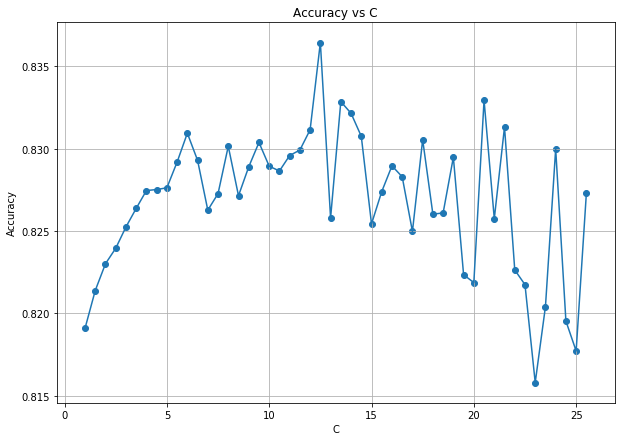

In [16]:
plt.figure(figsize=(10,7))
plt.plot(c, accuracy)
plt.scatter(c, accuracy)
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [17]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.85      0.82      0.83     24085
          1       0.83      0.85      0.84     23914

avg / total       0.84      0.84      0.84     47999



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=5)

In [18]:
cross_val_score(linear_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

array([ 0.82046875,  0.57536173,  0.80533767,  0.6511141 ,  0.65498922])

In [35]:
# c = list(np.arange(0.1, 1.0, 0.050))
# accuracy = []
# y_predicted = np.zeros((y_test.shape))
# max_accuracy = 0.0
# linear_svm_classifier = LinearSVC()

# for i in c:
#     classifier = LinearSVC(C = i)
#     classifier.fit(X_train, y_train)
#     predicted_y = classifier.predict(X_test)
#     accuracy.append(np.mean(y_test==predicted_y))
#     print('Accuracy for C = {:.2f} is : {:.4f}'.format(i, accuracy[-1]))
#     if(accuracy[-1] > max_accuracy):
#         y_predicted = predicted_y
#         max_accuracy = accuracy[-1]
#         linear_svm_classifier = classifier
        
# Output:
#     Accuracy for C = 0.10 is : 0.8139
#     Accuracy for C = 0.15 is : 0.8139
#     Accuracy for C = 0.20 is : 0.8146
#     Accuracy for C = 0.25 is : 0.8149
#     Accuracy for C = 0.30 is : 0.8150
#     Accuracy for C = 0.35 is : 0.8150
#     Accuracy for C = 0.40 is : 0.8152
#     Accuracy for C = 0.45 is : 0.8158
#     Accuracy for C = 0.50 is : 0.8157
#     Accuracy for C = 0.55 is : 0.8162
#     Accuracy for C = 0.60 is : 0.8161
#     Accuracy for C = 0.65 is : 0.8169
#     Accuracy for C = 0.70 is : 0.8169
#     Accuracy for C = 0.75 is : 0.8176
#     Accuracy for C = 0.80 is : 0.8179
#     Accuracy for C = 0.85 is : 0.8156
#     Accuracy for C = 0.90 is : 0.8178
#     Accuracy for C = 0.95 is : 0.8187

#### Using RBF kernel

In [15]:
from sklearn.svm import SVC

In [20]:
rbf_svm_classifier = SVC(kernel = 'rbf')
rbf_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
predicted_y = rbf_svm_classifier.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==predicted_y)))
print(classification_report(y_test,predicted_y))

Accuracy: 0.851246900977
             precision    recall  f1-score   support

          0       0.91      0.79      0.84     24085
          1       0.81      0.92      0.86     23914

avg / total       0.86      0.85      0.85     47999



In [25]:
# cross_val_score(rbf_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

In [16]:
c_rbf = list(np.arange(2, 15))
accuracy_rbf = []
y_predicted = np.zeros((y_test.shape))
max_accuracy_rbf = 0.0
rbf_svm_classifier = SVC(kernel = 'rbf')

for i in c_rbf:
    classifier = SVC(kernel = 'rbf', C = i)
    classifier.fit(X_train, y_train)
    predicted_y = classifier.predict(X_test)
    accuracy_rbf.append(np.mean(y_test==predicted_y))
    print('Accuracy for C = {:.2f} is : {:.4f}'.format(i, accuracy_rbf[-1]))
    if(accuracy_rbf[-1] > max_accuracy_rbf):
        y_predicted = predicted_y
        max_accuracy_rbf = accuracy_rbf[-1]
        rbf_svm_classifier = classifier

# There's not much difference in Accuracy when C differs by 0.5 
# Accuracy for C = 1.50 is : 0.8533
# Accuracy for C = 2.00 is : 0.8541
# Accuracy for C = 2.50 is : 0.8550
# Accuracy for C = 3.00 is : 0.8552
# Accuracy for C = 3.50 is : 0.8557
# Accuracy for C = 4.00 is : 0.8562
# Accuracy for C = 4.50 is : 0.8564
# Accuracy for C = 5.00 is : 0.8564
# Accuracy for C = 5.50 is : 0.8563
# Accuracy for C = 6.00 is : 0.8564
# Accuracy for C = 6.50 is : 0.8564
# Accuracy for C = 7.00 is : 0.8561

Accuracy for C = 2.00 is : 0.8541
Accuracy for C = 3.00 is : 0.8552
Accuracy for C = 4.00 is : 0.8562
Accuracy for C = 5.00 is : 0.8564
Accuracy for C = 6.00 is : 0.8564
Accuracy for C = 7.00 is : 0.8561
Accuracy for C = 8.00 is : 0.8563
Accuracy for C = 9.00 is : 0.8562
Accuracy for C = 10.00 is : 0.8563
Accuracy for C = 11.00 is : 0.8559
Accuracy for C = 12.00 is : 0.8559
Accuracy for C = 13.00 is : 0.8560
Accuracy for C = 14.00 is : 0.8560


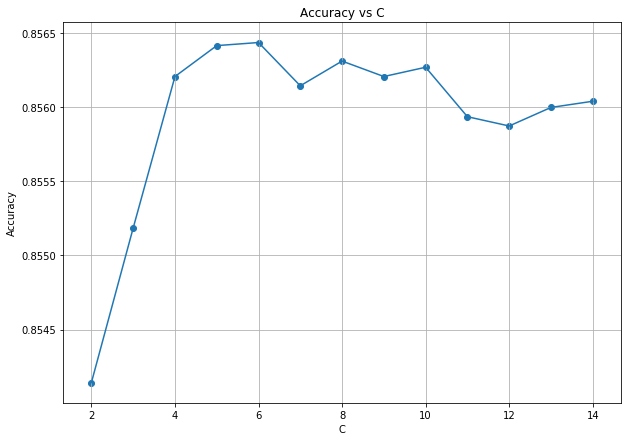

In [17]:
plt.figure(figsize=(10,7))
plt.plot(c_rbf, accuracy_rbf)
plt.scatter(c_rbf, accuracy_rbf)
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [18]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.90      0.80      0.85     24085
          1       0.82      0.91      0.86     23914

avg / total       0.86      0.86      0.86     47999



In [ ]:
# tried different values for C but it's not worth the time spent

# TODO
# try different values of gamma 
# train on dataset having 40 columns

#### Using poly kernel

In [26]:
poly_svm_classifier = SVC(kernel = 'poly')
poly_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
predicted_y = poly_svm_classifier.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==predicted_y)))
print(classification_report(y_test,predicted_y))

Accuracy: 0.820433759037
             precision    recall  f1-score   support

          0       0.87      0.75      0.81     24085
          1       0.78      0.89      0.83     23914

avg / total       0.83      0.82      0.82     47999



In [28]:
# cross_val_score(poly_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

#### Using sigmoid kernel

In [29]:
sigmoid_svm_classifier = SVC(kernel = 'sigmoid')
sigmoid_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
predicted_y = sigmoid_svm_classifier.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==predicted_y)))
print(classification_report(y_test,predicted_y))

Accuracy: 0.697993708202
             precision    recall  f1-score   support

          0       0.70      0.70      0.70     24085
          1       0.70      0.70      0.70     23914

avg / total       0.70      0.70      0.70     47999

